In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
from glob import glob
import random
import time
import tensorflow
import datetime
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

from tqdm import tqdm

import numpy as np
import pandas as pd
from IPython.display import FileLink
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline
from IPython.display import display, Image
import matplotlib.image as mpimg
import cv2

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files       
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg16 import VGG16

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tensorflow.keras import datasets, layers, models

#importing all the necessary modules/packages for this project
#print("Num GPUs Available: " , len(tensorflow.config.experimental.list_physical_devices('GPU')))

Using TensorFlow backend.


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
trainPath = 'C:/Users/Sarwar/Downloads/Stanford40/JPEGImages' #where the image set is located
IMG_SIZE = 224
batch_size = 300
nb_epoch = 1
NUMBER_CLASSES = 40
color_type = 3

In [3]:
def label_img(img): #this labels the images
    word_label = img.split('_')[0]
    next_word = img.split('_')[1]
    if len(img.split('_')) > 2:
        word_3 = img.split('_')[2]
    else:
        word_3 = 'nada' 
    if len(img.split('_')) > 3:
        word_4 = img.split('_')[3]
    else:
        word_4 = 'nada'
        
    label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    i = 0
    # 40-labels conversion ladder 
    if word_label == 'applauding': i = 0
    elif word_label == 'blowing': i = 1
    elif word_label == 'brushing': i = 2
    elif word_label == 'cleaning': i = 3
    elif word_label == 'climbing': i = 4
    elif word_label == 'cooking': i = 5
    elif word_label == 'cutting' and next_word == 'trees': i = 6
    elif word_label == 'cutting': i = 7
    elif word_label == 'drinking': i = 8
    elif word_label == 'feeding': i = 9
    #10
    elif word_label == 'fishing': i = 10
    elif word_label == 'fixing' and word_3 == 'bike': i = 11
    elif word_label == 'fixing': i = 12
    elif word_label == 'gardening': i = 13
    elif word_label == 'holding': i = 14
    elif word_label == 'jumping': i = 15
    elif word_label == 'looking' and word_4 == 'microscope': i = 16
    elif word_label == 'looking': i = 17
    elif word_label == 'playing' and next_word == 'guitar': i = 18
    elif word_label == 'playing': i = 19
    #20
    elif word_label == 'pouring': i = 20
    elif word_label == 'pushing': i = 21
    elif word_label == 'reading': i = 22
    elif word_label == 'phoning': i = 23
    elif word_label == 'riding' and word_3 == 'bike': i = 24
    elif word_label == 'riding': i = 25
    elif word_label == 'rowing': i = 26
    elif word_label == 'running': i = 27
    elif word_label == 'shooting': i = 28
    elif word_label == 'smoking': i = 29
    #30
    elif word_label == 'taking': i = 30
    elif word_label == 'texting': i = 31
    elif word_label == 'throwing': i = 32
    elif word_label == 'using': i = 33
    elif word_label == 'walking': i = 34
    elif word_label == 'washing': i = 35
    elif word_label == 'watching': i = 36
    elif word_label == 'waving': i = 37
    elif word_label == 'writing' and word_4 == 'board': i = 38
    elif word_label == 'writing': i = 39
    #40
    label[i] = 1
    return label

def label_to_string(label):
    if label[0] == 1: action = 'applauding'
    elif label[1] == 1: action = 'blowing'
    elif label[2] == 1: action = 'brushing'
    elif label[3] == 1: action = 'cleaning'
    elif label[4] == 1: action = 'climbing'
    elif label[5] == 1: action = 'cooking'
    elif label[6] == 1: action = 'cutting_trees'
    elif label[7] == 1: action = 'cutting'
    elif label[8] == 1: action = 'drinking'
    elif label[9] == 1: action = 'feeding'
    #10
    elif label[10] == 1: action = 'fishing'
    elif label[11] == 1: action = 'fixing_a_bike'
    elif label[12] == 1: action = 'fixing'
    elif label[13] == 1: action = 'gardening'
    elif label[14] == 1: action = 'holding'
    elif label[15] == 1: action = 'jumping'
    elif label[16] == 1: action = 'looking_under_microscope'
    elif label[17] == 1: action = 'looking'
    elif label[18] == 1: action = 'playing_guitar'
    elif label[19] == 1: action = 'playing'
    #20
    elif label[20] == 1: action = 'pouring'
    elif label[21] == 1: action = 'pushing'
    elif label[22] == 1: action = 'reading'
    elif label[23] == 1: action = 'phoning'
    elif label[24] == 1: action = 'riding_bike'
    elif label[25] == 1: action = 'riding'
    elif label[26] == 1: action = 'rowing'
    elif label[27] == 1: action = 'running'
    elif label[28] == 1: action = 'shooting'
    elif label[29] == 1: action = 'smoking'
    #30
    elif label[30] == 1: action = 'taking'
    elif label[31] == 1: action = 'texting'
    elif label[32] == 1: action = 'throwing'
    elif label[33] == 1: action = 'using'
    elif label[34] == 1: action = 'walking'
    elif label[35] == 1: action = 'washing'
    elif label[36] == 1: action = 'watching'
    elif label[37] == 1: action = 'waving'
    elif label[38] == 1: action = 'writing_board'
    elif label[39] == 1: action = 'writing'
    #40
    else: action = 'unknown'
    return action

In [4]:
# Color type: 1 - grey, 3 - rgb

def get_cv2_image(path, IMG_SIZE, color_type):
    # Loading as Grayscale image
    if color_type == 1:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    elif color_type == 3:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
    # Reduce size
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
    return img

def create_train_data(): #creates the x-variable of the training data
    training_data = []
    for img in tqdm(os.listdir(trainPath)):
        label = label_img(img)
        path = os.path.join(trainPath,img)
        img = get_cv2_image(path, IMG_SIZE, color_type)
        training_data.append([np.array(img),np.array(label)])
    #shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

#def process_test_data():

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0]
waving


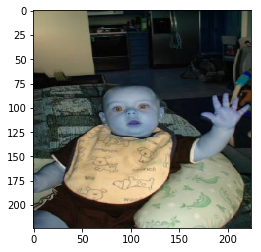

In [5]:
#testing
txt = "waving_hands_182.jpg"
label = label_img(txt)
path = os.path.join(trainPath,txt)
img = get_cv2_image(path, IMG_SIZE, 3)

plt.imshow(img)
#print(img)
#print(np.array(img))
#print(label)
print(np.array(label))
print(label_to_string(label))

In [6]:
def create_model():
    transferModel = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    x = Dense(40, activation='softmax', name='predictions')(transferModel.layers[-2].output)
    model = Model(input=transferModel.input, output=x)
    return model
    
model = create_model()
model.summary()
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

C:\Users\Sarwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
train = create_train_data()

100%|██████████████████████████████████████████████████████████████████████████████| 9532/9532 [02:34<00:00, 61.52it/s]


In [1]:
#If you have already created the dataset:
train = np.load('train_data.npy')

x = np.array([i[0] for i in train], dtype=np.uint8).reshape(-1, IMG_SIZE, IMG_SIZE, color_type)#(x_train, dtype=np.uint8)
y = np.array([i[1] for i in train])#np_utils.to_categorical(y_train, NUMBER_CLASSES)

print('There are %s total images.\n' % (len(x)))

NameError: name 'np' is not defined

In [ ]:
model.fit(x, y, batch_size=batch_size, epochs=nb_epoch)  # train the model

In [ ]:
'''
model.save('action_stanford.model')
new_model = tf.keras.models.load_model('action_stanford.model')
predictions = new_model.predict(x_test)
print(predictions)
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
'''